#**Importing:**

In [147]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
 
%matplotlib inline
 

In [148]:
df = pd.read_csv('/content/drive/MyDrive/vacci/country_vaccinations_by_manufacturer.csv', parse_dates = ["date"], index_col = ["date"])
df.head(3)

,location,vaccine,total_vaccinations
date,,,
2020-12-29,Argentina,Moderna,2
2020-12-29,Argentina,Oxford/AstraZeneca,3
2020-12-29,Argentina,Sinopharm/Beijing,1


In [149]:
def LinePlot():

  
  """We are plotting line plot and analyzing the total number of vaccine Monthly and yearly wise"""
  variables = ['date', 'vaccine', 'total_vaccinations']
  group_variables = variables[:2]
  outcome_variable = variables[2]
  # grouping the values by date and vaccine
  data = df.groupby(group_variables)[outcome_variable].sum().reset_index()
  vaccination_amount = data.set_index(['date', 'vaccine']).unstack('vaccine').fillna(0)
  vaccination_amount.columns = vaccination_amount.columns.levels[1].rename(None)
  
  # setting the new index
  new_index = pd.date_range(vaccination_amount.index.min(), vaccination_amount.index.max())

  new_vaccinations_amount = vaccination_amount.reindex(new_index, fill_value = 0)
  # Doing resampling by Month and Year

  monthly_vacinations = new_vaccinations_amount.resample('M').sum() 
  annual_vaccinations = new_vaccinations_amount.resample('Y').sum()

  plotsize = (13, 5) 

  # plotting the graphs
  plt.figure(figsize = (12, 5))
  

  plt.plot(monthly_vacinations,label = monthly_vacinations.columns)
  plt.legend(monthly_vacinations.columns)


  # setting the x and y labels
  
  plt.xlabel("Vaccine Monthly")
  plt.ylabel("Number of Vaccine")
  plt.title("Monthly")
  plt.show()
  
  plt.figure(figsize = (12, 5))
# plotting the yearly line plot
  plt.plot(annual_vaccinations,label=monthly_vacinations.columns)
  plt.legend(monthly_vacinations.columns)

  # setting the x and y labels and title as well

  plt.xlabel("Vaccine Yearly")
  plt.ylabel("Number of Vaccine")
  plt.title("Yearly")
  plt.show()



In [151]:
def BarPlot(column_name):

  
  """This function will get  the name of column as a parameter for plotting the barplot.
  will show the name of categories on x-axis and the value of frequency of categories  on y-axis"""

  plt.figure(figsize = (12, 5))
 
  # Creating a bar plot
  plt.bar(dict(df[column_name].value_counts()).keys(), dict(df[column_name].value_counts()).values())
  
  # setting the value of x-axis and y-axis

  plt.xlabel(f'{column_name}')
  plt.ylabel('Freqency')
  

  # Adding title
  plt.title(column_name)
  # Rotating the x-axis labels by 90 degrees

  plt.xticks(rotation = 90)
  # Show the plot
  plt.show()
 
 

In [152]:
def PiePlot(column_name):


  """Pie chart represents the percentage of each category in slices.
  This function will receive the name of column of which we want to plot the pie chart
  """
  
  # Setting the size of figure plotting the pie chart 
  plt.figure(figsize = (12, 5))
  
 

  # Separating the categories and its values for plotting bar plot
  categories = dict(df[column_name].value_counts()).keys()
  values = dict(df[column_name].value_counts()).values()
  
  plt.pie(values, labels = categories, autopct = '%1.1f%%')
  legends = ['%s' % (l) for l, s in zip(categories, values)]
  
  # Adding legend with percentage and category labels
  plt.legend(labels = legends, bbox_to_anchor = (0.8, 1))

  # Add title
  plt.title(column_name)

  # Rotate the x-axis labels by 90 degrees
  plt.xticks(rotation = 90)
  
  # Show the plot
  plt.show()



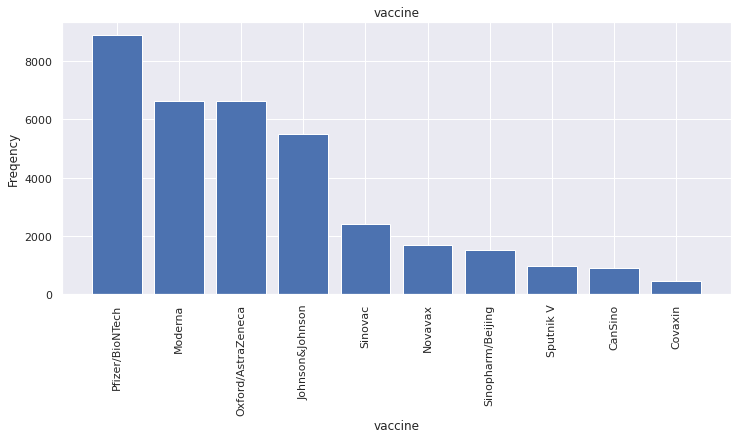

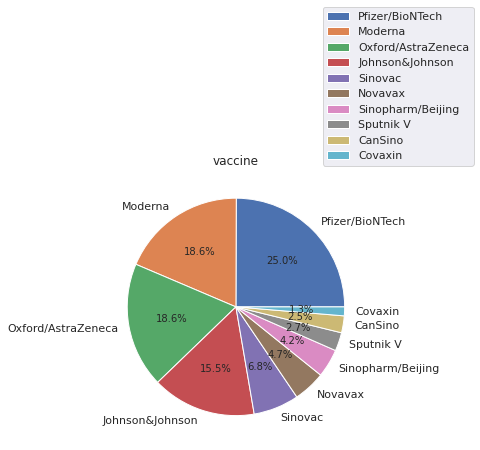

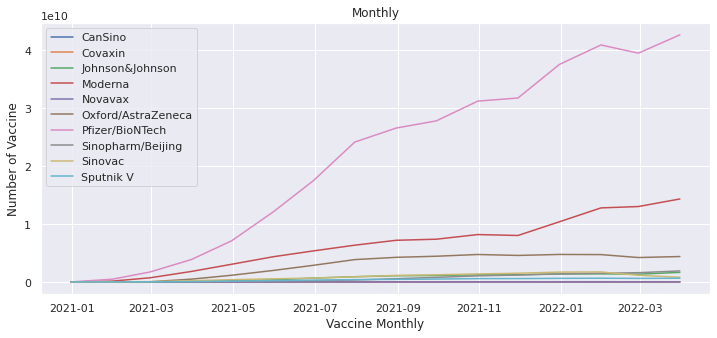

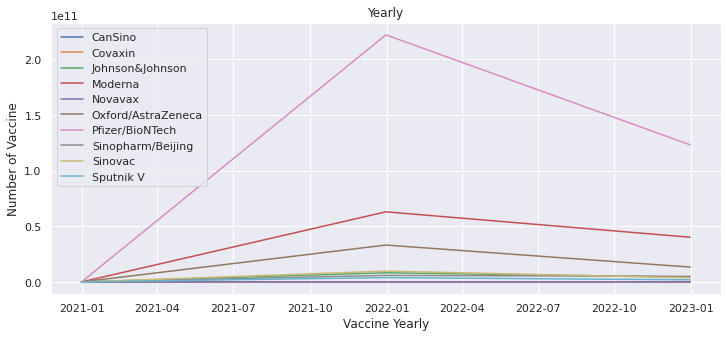

In [153]:
def main(): 


  """Calling all 3 functions in a sequence"""
  BarPlot("vaccine")
  PiePlot("vaccine")
  LinePlot()
        


if __name__=="__main__":


  """Python Interpreter will directly come here and will run these lines"""
  main()

  